In [24]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import time
from sklearn.neighbors import KNeighborsClassifier






--Train Images--
Num of All Images:  950
Num of Beds Images:  190
Num of chairs Images:  190
Num of nightstands Images:  190
Num of sofas Images:  190
Num of tables Images:  190
--Test Images--
Num of Images:  50
cuda 로 학습
Finished Training
[[-0.34329927  0.23010804  0.16725916 -0.23195857  0.06794013]
 [-0.21326578  0.01792876 -0.0957709  -0.07833833  0.05822238]
 [-0.70803416  0.12621954  0.13969469 -0.37465525 -0.11538998]
 ...
 [-0.10906339  0.044854    0.01072351  0.00605769 -0.03278759]
 [-0.15821974  0.14302123 -0.01563921 -0.33338273 -0.01113774]
 [-0.16401979 -0.03105126 -0.0126224  -0.06138574  0.00212167]]

Tensor to np
238
[[  0  40 280 477]]
0
find!
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:145: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


find!
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])
find!
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])
find!
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])


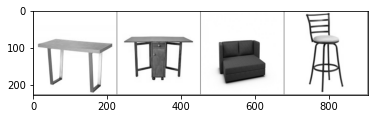

In [29]:

# train_location = './drive/MyDrive/data/img/train/'
# test_location = './drive/MyDrive/data/img/val/'

train_location = './drive/MyDrive/data/Furniture/train/'
test_location = './drive/MyDrive/data/Furniture/val/'
X = np.empty((0, 4), dtype=int)
X_final = np.empty((0,4),dtype=int)
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째층
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 8, kernel_size=3,stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 두번째층
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(8, 16, kernel_size=3,stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 전결합층 
        self.fc = torch.nn.Linear(50176, 5, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        global X
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten
        out = self.fc(out)
        X = np.append(X,out.detach().numpy())
        return out

class FurnitureDataset():
    def __init__(self, image, class_to_int, mode, transforms):
        super().__init__()
        self.image = image
        self.class_to_int = class_to_int
        self.mode = mode
        self.transforms = transforms

    def __getitem__(self, index):
        image_name = self.image[index]
        image = Image.open(train_location + image_name)
        image = image.resize((224,224))

        if self.mode == 'train' :
            #레이블 입력
            label = self.class_to_int[image_name.split('.')[0]]
            label = torch.tensor(label,dtype=torch.long)
            #이미지 변형 적용
            image = self.transforms(image)
            return image, label
        elif self.mode == 'test':
          #레이블 입력
            label = self.class_to_int[image_name.split('.')[0]]
            label = torch.tensor(label,dtype=torch.long)
            #이미지 변형 적용용
            image = self.transforms(image)
            return image, label

    def __len__(self):
        return len(self.image)

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

if __name__ == '__main__':
    #데이터 셋 불러오고 정규화
    transform = transforms.Compose(
        [transforms.Grayscale(num_output_channels=1),
         transforms.ToTensor(),
          transforms.Normalize((0.5),(0.5))
          ]
    )

    train_images = os.listdir(train_location)
    test_images = os.listdir(test_location)
    print("--Train Images--")
    print("Num of All Images: ", len(train_images))

    beds_list = [img for img in train_images if img.split(".")[0] == "bed"]
    chairs_list = [img for img in train_images if img.split(".")[0] == "chair"]
    nightstands_list = [img for img in train_images if img.split(".")[0] == "nightstand"]
    sofas_list = [img for img in train_images if img.split(".")[0] == "sofa"]
    tables_list = [img for img in train_images if img.split(".")[0] == "table"]
    print("Num of Beds Images: ", len(beds_list))
    print("Num of chairs Images: ", len(chairs_list))
    print("Num of nightstands Images: ", len(nightstands_list))
    print("Num of sofas Images: ", len(sofas_list))
    print("Num of tables Images: ", len(tables_list))
    print("--Test Images--")
    print("Num of Images: ", len(test_images))

    # 레이블 구분
    class_to_int = {"bed": 0, "chair": 1, "nightstand": 2, "sofa": 3, "table": 4}
    int_to_class = {0: "bed", 1: "chair", 2: "nightstand", 3: "sofa", 4: "table"}
    classes = ['bed', 'chair', 'nightstand', 'sofa', 'table']

    # 데이터 셋 생성
    train_dataset = FurnitureDataset(train_images, class_to_int, mode='train', transforms=transform)
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)

    test_dataset = FurnitureDataset(test_images, class_to_int, mode='test', transforms=transform)
    testloader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=True, num_workers=0)
    net = CNN()
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print (device,"로 학습")

    #신경망 학습하기
    for i, data in enumerate(trainloader,0):
        inputs, labels = data  # data입력
        outputs = net(inputs)


    print('Finished Training')
 
#############################################test########################################
    X = np.reshape(X,(950,5)) #1281개 5개tensor
    Y = np.ones((950,1),dtype=int)
    print(X)
#tensor -> np (train)
    print("\nTensor to np")
    #X = np.empty((0, 4), dtype=int)

    #for data in trainloader:
      #images, labels = data
      #outputs = net(images)
      #X = np.append(X,outputs.detach().numpy())
      #Y = np.append(Y,labels.numpy())

    #Y = np.reshape(Y,(950,1)) #1281개 1개label
    # print("Image size",images.shape)
    #np knn
    reg = KNeighborsClassifier(n_neighbors=4)
    reg.fit(X,Y)
    l = reg.kneighbors([X[0]],n_neighbors=4,return_distance=False) #이미지 입력부분 (np)
    l.sort()
    for i in l:
      temp = np.empty((0,4),dtype=int)
      temp = np.append(temp, X[i])
    temp = np.reshape(temp,(4,5)) #4개 5개tensor(np)
    # print(temp) #가장 가까운 이미지 4개 출력(np)

    #np -> tensor 
    # result = torch.tensor(temp)
    # print(result)

    dataiter = iter(trainloader)
    print(len(dataiter))
    count = 0
    print(l)
    print(l[0][0])
    index=0
    
    images = torch.empty(4,1,224,224)
    
    while(index<4):
      if count < l[0][index]:
        img=dataiter.next()
        count+=4
      else:
        print("find!")
        #l[0][index]-count 한 값을 인덱스로 dataiter에서 출력
        print(img[0][l[0][index]-count][0])
        images[index][0] = img[0][l[0][index]-count][0]
        dataiter.next()
        count+=4
        index+=1
    #이미지 출력
    imshow(torchvision.utils.make_grid(images))

    #CNN tensor 출력
    



In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
